# Machine Learning with Logistic Regression

In this project, we will use the Logistic Regression algorithm to classify the mail spam or ham

In [1]:
## Importing Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

## DATA

In [2]:
df = pd.read_csv("./mail_data.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Checking if there are any NULL values

In [4]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


### Replacing Categorical labels with numbers

In [6]:
df.replace(to_replace={'Category': {'spam':0, 'ham':1}}, inplace=True )

# spam-->0
# ham-->1

In [7]:
df.head(3)

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...


In [8]:
df['Category'].value_counts()

1    4825
0     747
Name: Category, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

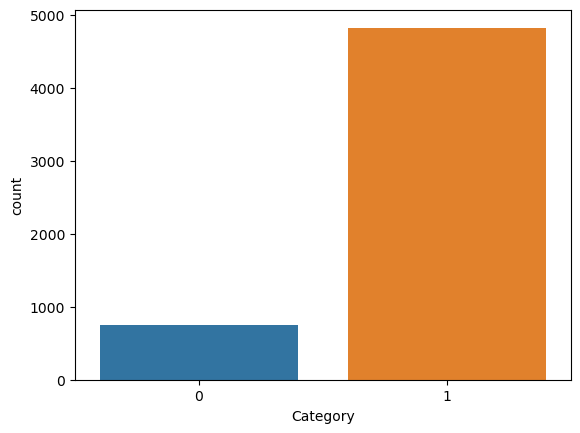

In [9]:
sns.countplot(x='Category', data = df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int64 
 1   Message   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [11]:
X = df["Message"]
y = df['Category']

In [12]:
X.shape, y.shape

((5572,), (5572,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [14]:
X_train.shape, X_test.shape

((4457,), (1115,))

In [15]:
y_train.value_counts()

1    3854
0     603
Name: Category, dtype: int64

### Now balancing the classes

In [16]:
from imblearn.over_sampling import RandomOverSampler

In [17]:
ros = RandomOverSampler(random_state=40)

In [18]:
X_train_os, y_train_os = ros.fit_resample(np.array(X_train).reshape(-1,1), y_train)

In [19]:
y_train.value_counts(), y_train_os.value_counts()

(1    3854
 0     603
 Name: Category, dtype: int64,
 0    3854
 1    3854
 Name: Category, dtype: int64)

In [20]:
X_train.shape, X_train_os.shape

((4457,), (7708, 1))

## Feature Extraction

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
fe = TfidfVectorizer(stop_words='english', min_df=1, lowercase=True)

In [23]:
X_train_fv = fe.fit_transform(X_train_os.flatten())

In [24]:
X_test_fv = fe.transform(X_test)

In [25]:
X_test_fv.shape, X_train_fv.shape

((1115, 7522), (7708, 7522))

In [26]:
y_train_os.shape, y_test.shape

((7708,), (1115,))

## Model Building

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train_fv, y_train_os)

LogisticRegression()

In [29]:
model.score(X_test_fv, y_test)

0.9748878923766816

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test, model.predict(X_test_fv)))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       144
           1       0.99      0.98      0.99       971

    accuracy                           0.97      1115
   macro avg       0.94      0.95      0.94      1115
weighted avg       0.98      0.97      0.97      1115



This is good sign that our MODEL is performing well with 97 accuracy 

and this is the conclusion of our project